In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from datetime import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import json
from keras.layers import LSTM, Dense

In [ ]:
data = pd.read_csv('Merch_CB_hack.csv')
date_format = "%Y-%m-%d %H:%M:%S"

data['day'] = pd.to_datetime(data['day'], format=date_format)

data['days_since_2022'] = (data['day'] - datetime.strptime("1/1/2022", "%m/%d/%Y")).dt.days


In [ ]:
with open('res.json') as f:
  json_ = json.load(f)
json_data = json_
for branch, companies in json_.items():

    # Iterate over companies within the branch
    for company, company_data in companies.items():
        x_axis = []
        y_axis = []

        # Prepare data for the current company
        for point in company_data:
          x_axis.append(point[0])
          y_axis.append(point[1])
        company_data = {}
        company_data['x'] = x_axis
        company_data['y'] = y_axis
        json_data[branch][company] = company_data
json_data

{'Clothes': {'4SEASONS': {'x': [240.94,
    54.38,
    265.59,
    113.25,
    100.31,
    293.44,
    304.69,
    258.38,
    84.38,
    190.31,
    637.5,
    270.0,
    121.5,
    195.0,
    157.5,
    108.75,
    105.0,
    123.75,
    45.0,
    48.75,
    475.84,
    120.23,
    100.41,
    169.69,
    163.5,
    292.5,
    58.13,
    8.63],
   'y': [129.0,
    130.0,
    131.0,
    132.0,
    133.0,
    134.0,
    135.0,
    136.0,
    137.0,
    139.0,
    140.0,
    141.0,
    142.0,
    144.0,
    145.0,
    146.0,
    147.0,
    148.0,
    149.0,
    151.0,
    152.0,
    153.0,
    154.0,
    155.0,
    156.0,
    157.0,
    158.0,
    159.0]},
  'adidas': {'x': [172.25,
    8180.65,
    9090.06,
    7576.27,
    75147.08,
    13617.64,
    12386.51],
   'y': [25.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0]},
  'I am studio': {'x': [341.25,
    188.67,
    443.2,
    351.56,
    511.49,
    135.94,
    335.1,
    439.34,
    823.77,
    186.33,
    1034.53,
    238.01,
    281.18,

In [ ]:
data = data.sort_values(by=['merchant_name'])
data

,merchant_name,day,month,cashback,days_since_2022
8355,#SEKTA,2022-04-23,2022-04-01 00:00:00,62.12,112.0
21580,#SEKTA,2022-11-02,2022-11-01 00:00:00,79.83,305.0
21581,#SEKTA,2022-11-03,2022-11-01 00:00:00,76.88,306.0
21582,#SEKTA,2022-11-04,2022-11-01 00:00:00,19.69,307.0
21583,#SEKTA,2022-11-05,2022-11-01 00:00:00,25.79,308.0
...,...,...,...,...,...
6518,интернет-магазин Технопарк,2022-03-17,2022-03-01 00:00:00,915.81,75.0
6517,интернет-магазин Технопарк,2022-03-01,2022-03-01 00:00:00,4183.35,59.0
13964,интернет-магазин Технопарк,2022-07-22,2022-07-01 00:00:00,26526.60,202.0
13949,интернет-магазин Технопарк,2022-07-07,2022-07-01 00:00:00,19390.24,187.0


In [ ]:
'''
data_parcing
'''
merchant_name = data['merchant_name'][0]
data_train = []
temp_data = []
data_vkus = []
for index, elem in data.iterrows():
  if elem['merchant_name'] == merchant_name:
    temp_data.append([elem['days_since_2022'], elem['cashback']])
  else:
    if merchant_name.find("Вкус") > -1:
      data_vkus.append(temp_data)
    if len(temp_data) > 0:
      data_train.append(temp_data)
    merchant_name = elem['merchant_name']
    temp_data = []
    temp_data.append([elem['days_since_2022'], elem['cashback']])
data_vkus

NameError: name 'data' is not defined

In [ ]:
'''
self-written normalization for kids
'''

def norm(data):
  for i in range(len(data)):
    data_test = data[i]
    xmax = 0
    ymax = 0
    for elem in data_test:
      print(elem)
      xmax = max(xmax, elem[0])
      ymax = max(ymax, elem[1])

    for elem in range(len(data_test)):
      data_set[elem][0] /= xmax
      data_set[elem][1] /= ymax

In [ ]:
data_pere = []
for index, elem in data.iterrows():
  if elem['merchant_name'] == "Перекрёсток":
    data_pere.append([elem['days_since_2022'], elem['cashback']])

xmax = 0
ymax = 0
for elem in data_pere:
  print(elem)
  xmax = max(xmax, elem[0])
  ymax = max(ymax, elem[1])

for elem in data_pere:
  elem[0] /= xmax
  elem[1] /= ymax

X_test = np.array([item[0] for item in data_pere]).reshape(-1,  1) # Features
y_test = np.array([item[1] for item in data_pere])



In [ ]:
data_vkus = np.array(data_vkus, dtype=object)

In [ ]:
'''
fnn for loosers
'''

model = Sequential()
model.add(Dense(40, input_dim=1, activation='relu'))  # Hidden layer
model.add(Dense(40, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
'''
BIG PIECE OF GARBAGE


fnn for loosers. punks not dead
'''


for i in range(len(data_vkus)):
  data_test = data_vkus[i]
  xmax = 0
  ymax = 0
  for elem in data_test:
    xmax = max(xmax, elem[0])
    ymax = max(ymax, elem[1])

  for elem in data_test:
    elem[0] /= xmax
    elem[1] /= ymax

print(len(data_test))

X_train = np.array([item[0] for item in data_vkus[0]]).reshape(-1,  1) # Features
y_train = np.array([item[1] for item in data_vkus[0]])

X1_train = np.array([item[0] for item in data_vkus[1]]).reshape(-1,  1) # Features
y1_train = np.array([item[1] for item in data_vkus[1]])

X2_train = np.array([item[0] for item in data_vkus[2]]).reshape(-1,  1) # Features
y2_train = np.array([item[1] for item in data_vkus[2]])

X3_train = np.array([item[0] for item in data_vkus[3]]).reshape(-1,  1) # Features
y3_train = np.array([item[1] for item in data_vkus[3]])

X4_train = np.array([item[0] for item in data_vkus[4]]).reshape(-1,  1) # Features
y4_train = np.array([item[1] for item in data_vkus[4]])

X5_train = np.array([item[0] for item in data_vkus[5]]).reshape(-1,  1) # Features
y5_train = np.array([item[1] for item in data_vkus[5]])

X6_train = np.array([item[0] for item in data_vkus[6]]).reshape(-1,  1) # Features
y6_train = np.array([item[1] for item in data_vkus[6]])

X7_train = np.array([item[0] for item in data_vkus[7]]).reshape(-1,  1) # Features
y7_train = np.array([item[1] for item in data_vkus[7]])
X8_train = np.array([item[0] for item in data_vkus[8]]).reshape(-1,  1) # Features
y8_train = np.array([item[1] for item in data_vkus[8]])
X9_train = np.array([item[0] for item in data_vkus[9]]).reshape(-1,  1) # Features
y9_train = np.array([item[1] for item in data_vkus[9]])


22


In [ ]:
'''
cringe
'''
model.fit(X_train, y_train, epochs=150, batch_size=5)
model.fit(X1_train, y1_train, epochs=150, batch_size=5)
model.fit(X2_train, y2_train, epochs=150, batch_size=5)
model.fit(X3_train, y3_train, epochs=150, batch_size=5)
model.fit(X4_train, y4_train, epochs=150, batch_size=5)
model.fit(X5_train, y5_train, epochs=150, batch_size=5)
model.fit(X6_train, y6_train, epochs=150, batch_size=5)
model.fit(X7_train, y7_train, epochs=150, batch_size=5)
model.fit(X8_train, y8_train, epochs=150, batch_size=5)
model.fit(X9_train, y9_train, epochs=150, batch_size=5)

10/10 - 0s - loss: 0.2986 - 115ms/epoch - 12ms/step
Test MSE: 0.29857340455055237
10/10 [==============================] - 0s 2ms/step


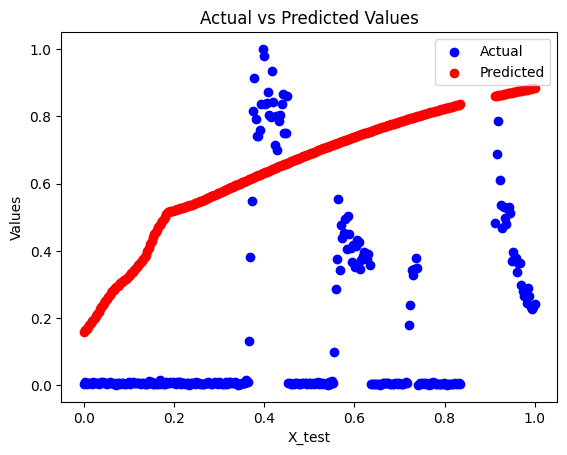

In [ ]:
'''
the funniest thing is that this piece of shit would score more points than the solution which we provided
'''
mse = model.evaluate(X_test, y_test, verbose=2)
print(f"Test MSE: {mse}")
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X_test')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
'''
this one fixed data with 0 points
yea it's quite late to fix this but who cares
'''
for branch, companies in json_data.items():

    for company, company_data in companies.items():
        print(company_data)
        if len(company_data['x']) == 0 or len(company_data['y']) == 0:
          json_data[branch][company]['x'] = [1.0]
          json_data[branch][company]['y'] = [1.0]

        xmax = max(company_data['x'])
        ymax = max(company_data['y'])
        for key, elem in company_data.items():
          if key == 'x':
            for x in range(len(elem)):
              elem[x] /= xmax

          if key == 'y':
            for y in range(len(elem)):
              elem[y] /= ymax

json_data


In [ ]:
'''
neural network itself
long story short, i find quite funny that lstm is created mostly for ndim=3 data and basically can be expanded
on higher ndim(bcs z=features, which can be any natural num so no one can stop you from creating 69420-dimensional nn)

nonetheless this thing is like hadron collider for our task, but, the precision of 1e-4 is awesome result!!!!
'''

for branch, companies in json_data.items():
    print(f"Branch: {branch}")
    model = Sequential([
            LSTM(64, input_shape=(X_train.shape[1], 1)),
            Dense(32, activation='relu'),
            Dense(1)
        ])
    model.compile(optimizer='adam', loss='mse')

    for company, company_data in companies.items():
        print(f"Company: {company}")
        if len(X_company) == 0 or len(y_company) == 0:
          pass
        else:
          X_company = pd.DataFrame(company_data['x'])
          y_company = pd.DataFrame(company_data['y'])



          X_train, X_test, y_train, y_test = train_test_split(X_company, y_company, test_size=0.2, random_state=42)
          model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

          loss = model.evaluate(X_test, y_test)
          print(f"Test Loss: {loss}")

    model.save(f"{branch}_model.h5")


In [ ]:
'''
this part can be seen in fastapi files, but the prototype of final version was built there
hackathon task was awful and this code was written very badly, so, there are more space for improvement

in short - it predicts the future step from given data
'''
from keras.models import load_model

def normalize(y_cashbacks, budget):
    if y_cashbacks.shape[0] < 5:
      return pd.DataFrame([[0] * len(y_cashbacks.columns)] * len(y_cashbacks), columns=y_cashbacks.columns)
    ymax = max(y_cashbacks['0'], budget)
    y_norm = y_cashbacks['0'] / ymax
    return y_norm

def algo(cash, branch, y_cashbacks, budget):
    x_new = pd.DataFrame([[i/15] for i in range(1, 16)])
    y_cashbacks = y_cashbacks.append({'0': cash}, ignore_index=True)
    y_norm = normalize(y_cashbacks, budget)
    model = load_model(f"{branch}_model.h5")

    predicted_cashback = model.predict(x_new.values.reshape(-1, 1, 1))

    return predicted_cashback[0][0] >= y_norm.iloc[-1]


def algo_branch(cash, branches, y_cashbacks, budget):
    loss_list = []
    x_new = pd.DataFrame([[i/15] for i in range(1, 16)])
    y_cashbacks = y_cashbacks.append({'0': cash}, ignore_index=True)
    y_norm = normalize(y_cashbacks)

    for branch in branches:
        model = load_model(f"{branch}_model.h5")
        loss = model.evaluate(x_new.values.reshape((-1, 1, 1)), 1)
        loss_list.append([branch, loss])

    loss_list.sort(key=lambda x: x[1])
    need_branch = loss_list[0][0]

    return algo(cash, need_branch, y_cashbacks, budget)

algo(100, 'Clothes', pd.DataFrame({'0': [5]}))


<ipython-input-54-01f1752dd45b>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_cashbacks = y_cashbacks.append({'0': cash}, ignore_index=True)


2


1/1 [==============================] - 0s 441ms/step


0    True
Name: 1, dtype: bool

In [ ]:
import pandas
pandas.__version__


'1.5.3'